In [1]:
import csv 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
import plotly.express as px
import mlflow

In [2]:
org=pd.read_csv("data/cardio_train.csv",sep=";")

In [3]:
org.shape

(70000, 13)

In [4]:
org.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
org.duplicated().sum()

0

In [7]:
org.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
org.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
hear_corr = org.corr(numeric_only=True)
hear_corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


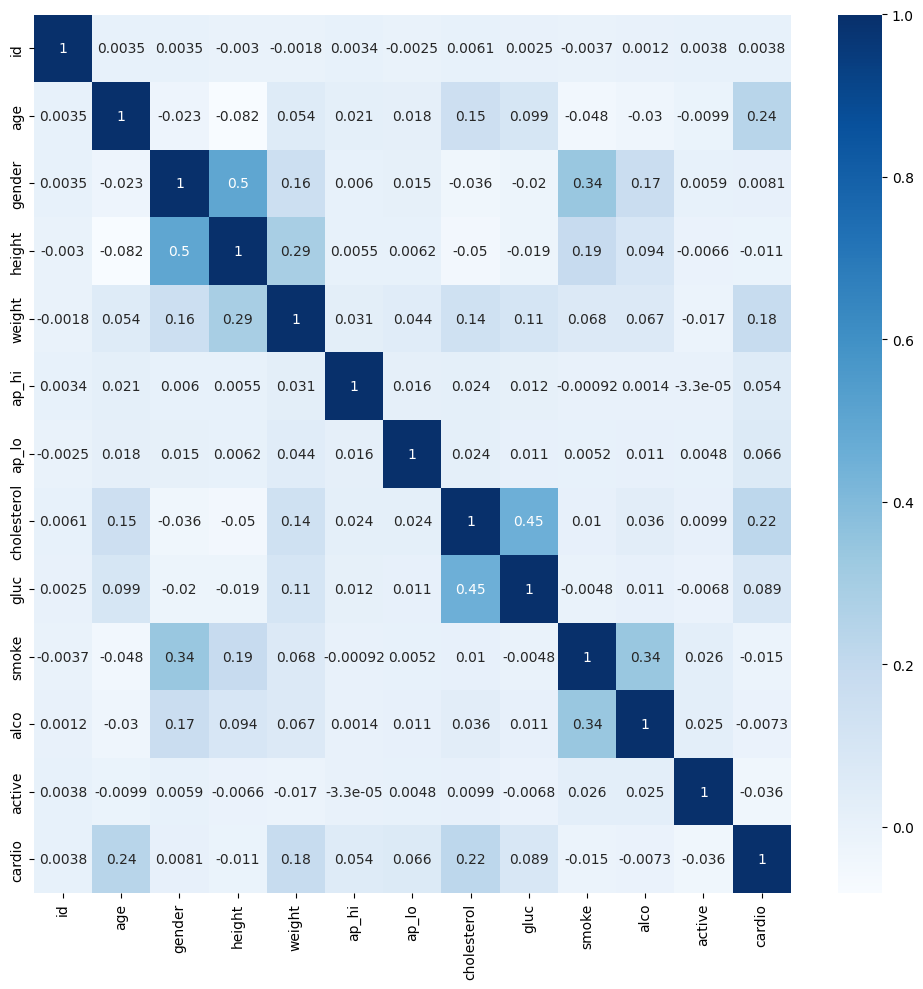

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(hear_corr, annot=True, cmap='Blues')
plt.tight_layout()

In [11]:
org['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<AxesSubplot: >

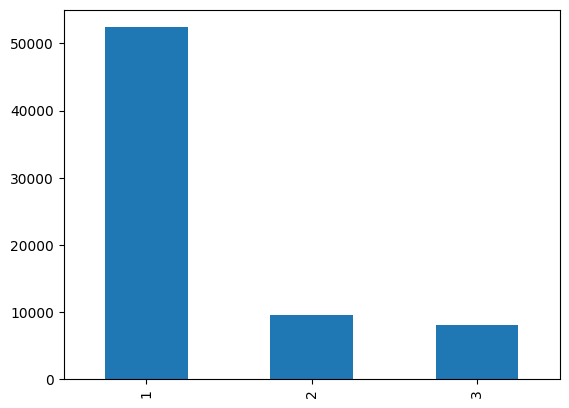

In [12]:
org['cholesterol'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='gender', ylabel='count'>

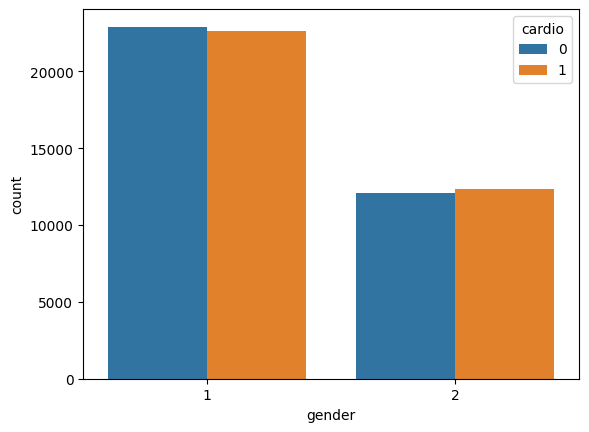

In [13]:
sns.countplot(data=org, x="gender", hue="cardio")

In [14]:
#Converting the age into round figure
org['new_age'] = (org['age']/365).round(0)

In [15]:
org['new_age']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: new_age, Length: 70000, dtype: float64

<AxesSubplot: xlabel='new_age', ylabel='count'>

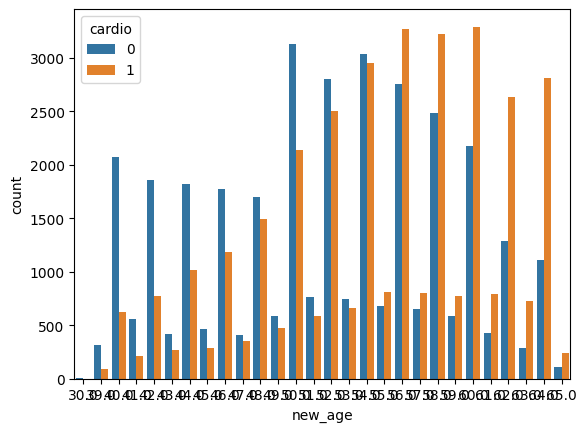

In [16]:
sns.countplot(data = org, x = org['new_age'], hue = 'cardio')

In [17]:
org.drop(['new_age'], axis = 'columns')


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


<AxesSubplot: xlabel='gluc', ylabel='count'>

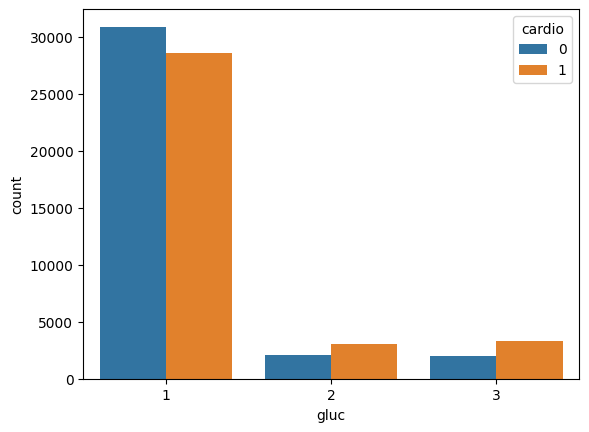

In [18]:
sns.countplot(x='gluc',hue='cardio',data=org)

In [19]:
age_chol = pd.DataFrame({
    'The Cardiac disease by average' : org.groupby('cholesterol')['cardio'].mean(numeric_only=True),
    'The amount of Cholesterol' : ['Normal', 'Above Normal', 'Well Above Normal']
})
px.bar(age_chol, 'The amount of Cholesterol', 'The Cardiac disease by average',
       color='The amount of Cholesterol', title='The risk of Cardiac disease by increasing colesterol')

In [20]:
numeric_columns = org.select_dtypes(include=[int, float]).columns

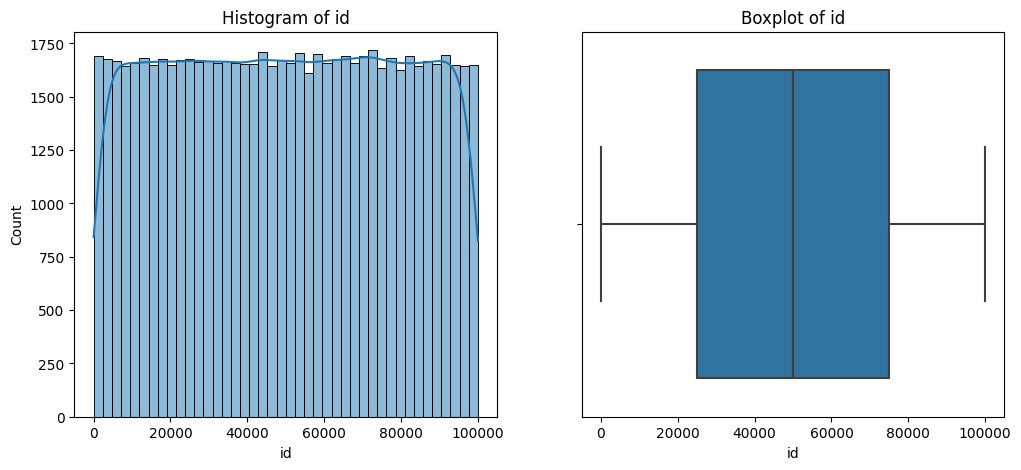

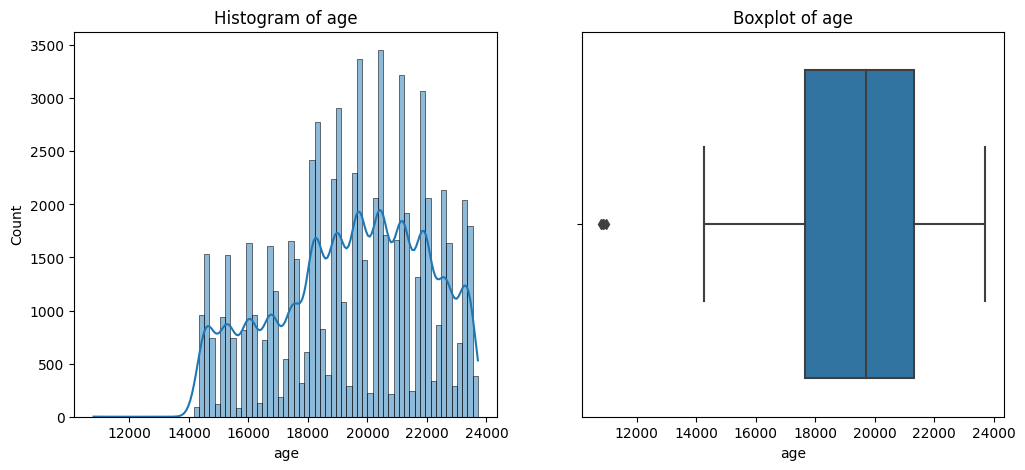

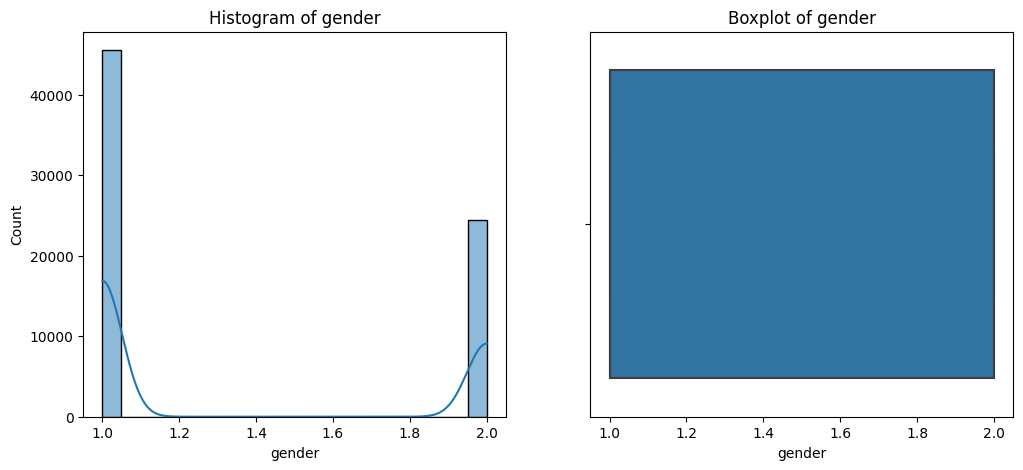

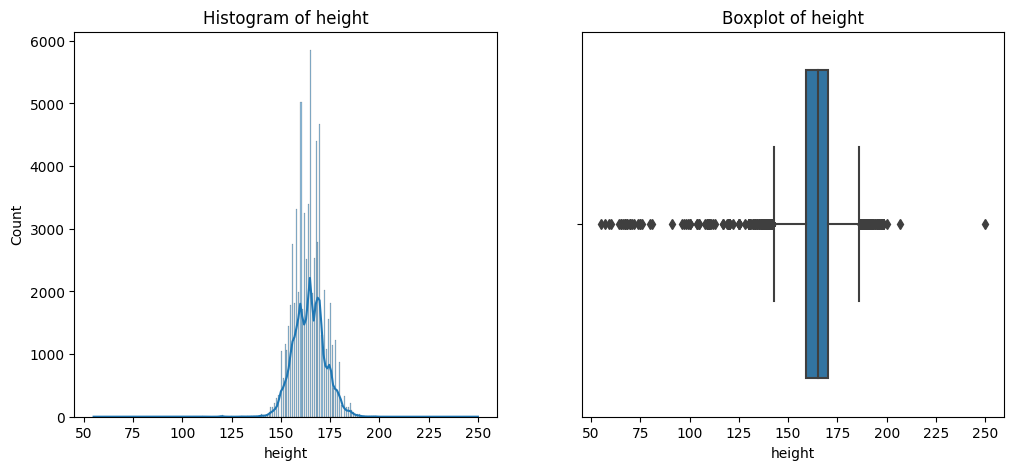

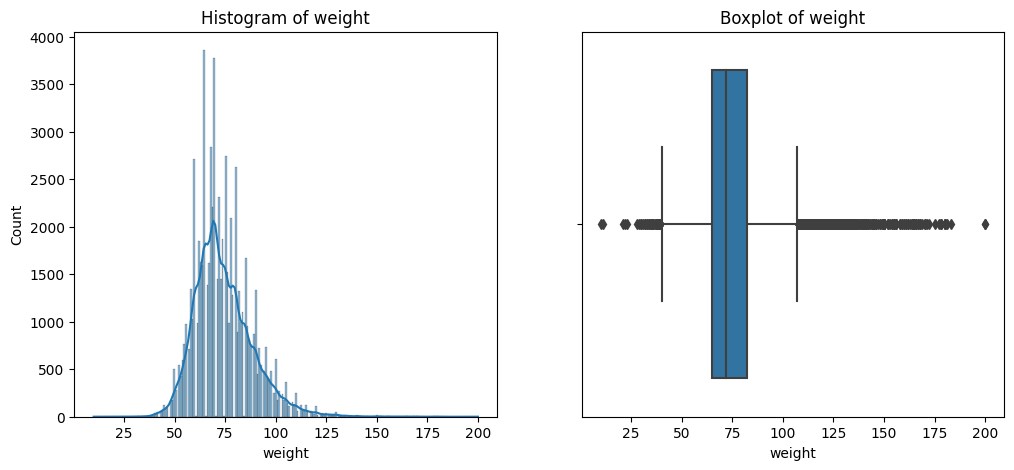

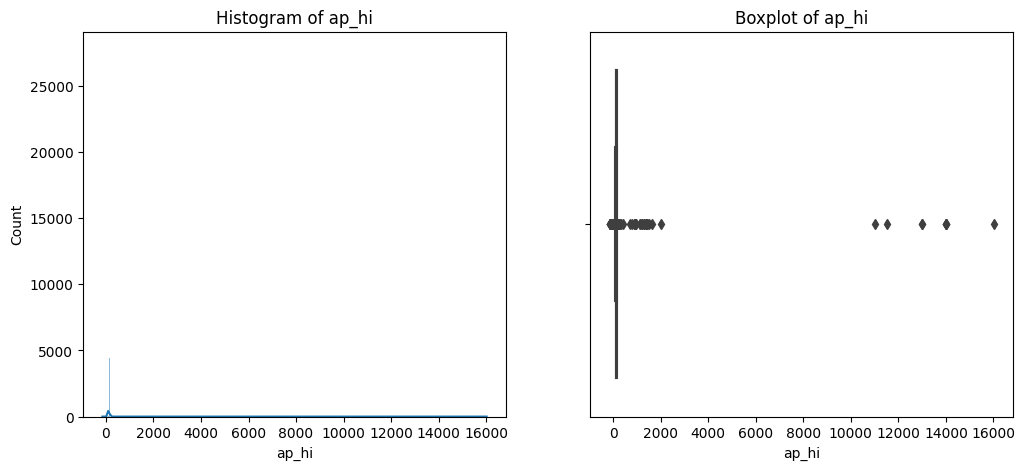

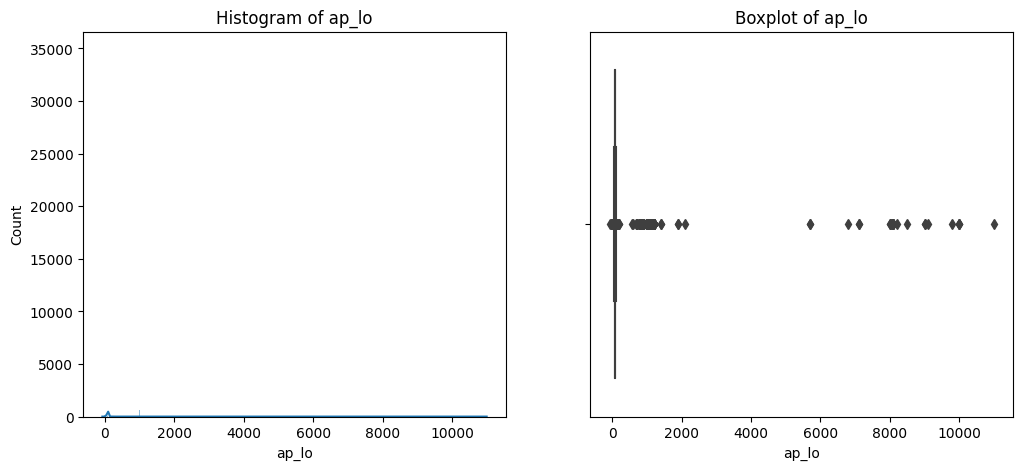

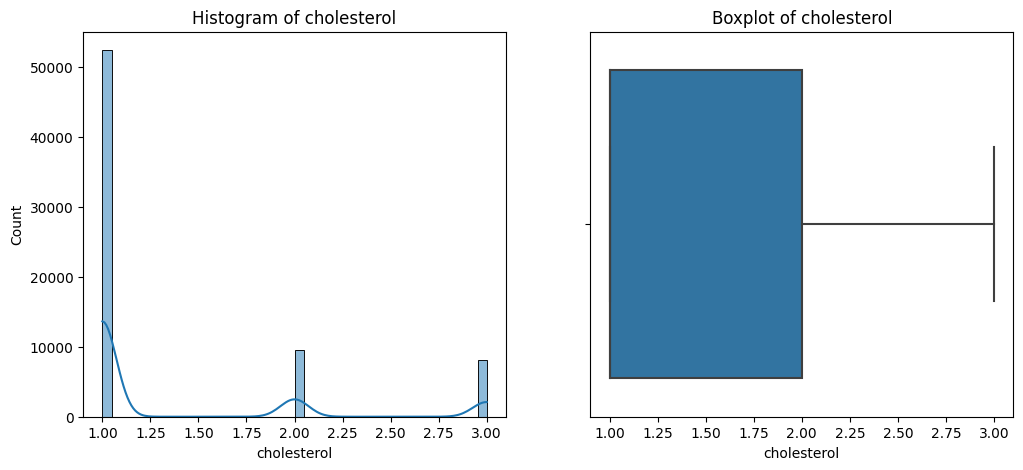

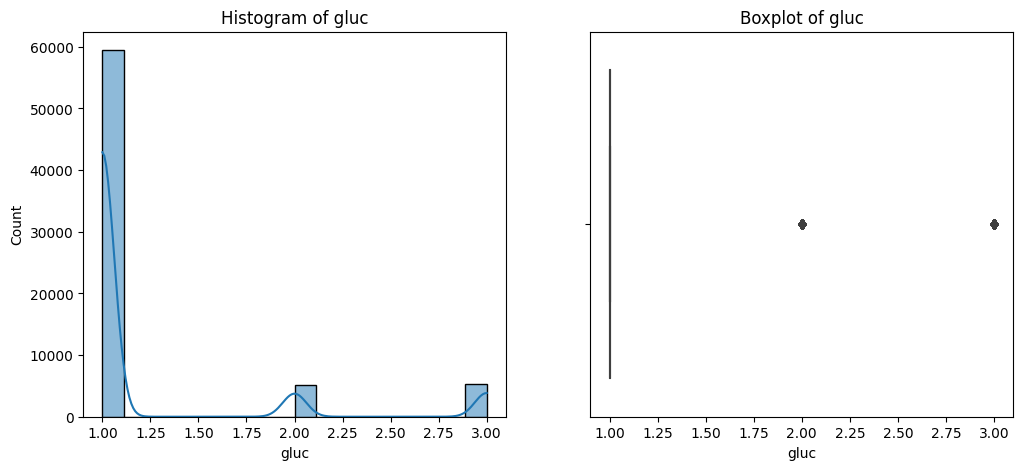

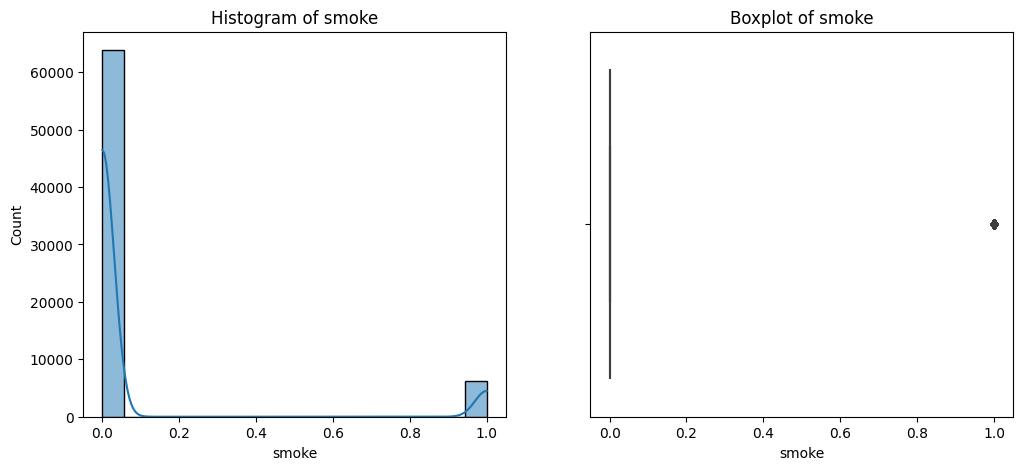

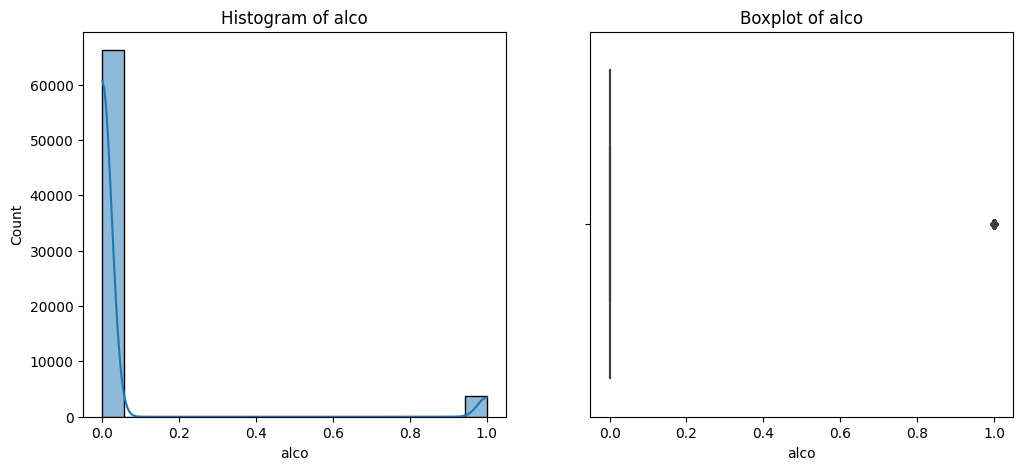

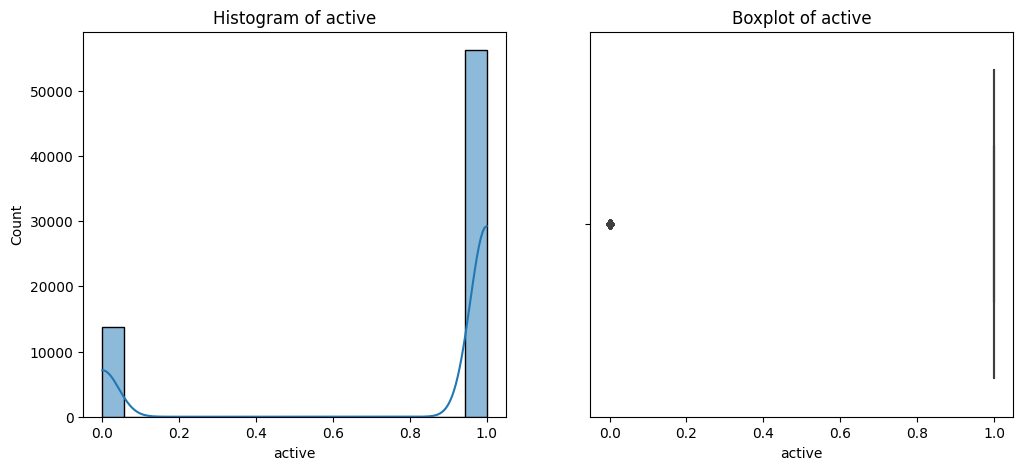

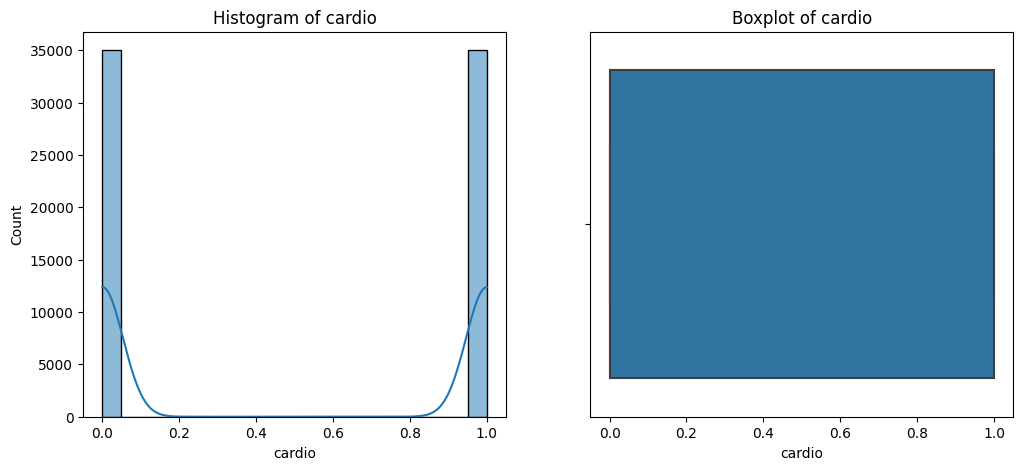

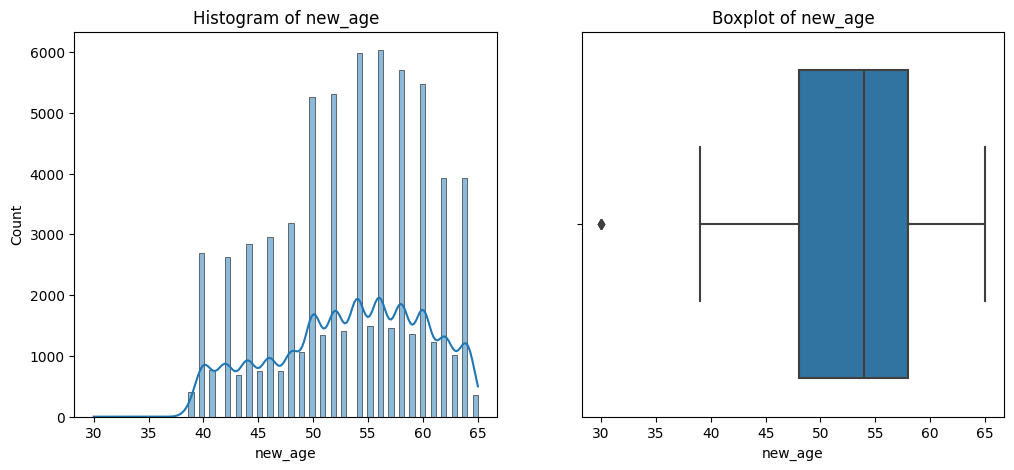

In [21]:
for col in numeric_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot histogram
    sns.histplot(org, x=col, kde=True, ax=axes[0])
    axes[0].set_title('Histogram of ' + col)

    # Plot boxplot
    sns.boxplot(x=org[col], ax=axes[1])
    axes[1].set_title('Boxplot of ' + col)

    plt.show()

In [22]:
df, dftrac = train_test_split(org, test_size=0.3, random_state=42)

# Enregistrer l'ensemble de test (20 %) dans un fichier CSV
#dftrac.to_csv('test_data.csv', index=False)

In [23]:
#df.to_csv('datatraining.csv', index=False)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49000 entries, 68681 to 15795
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49000 non-null  int64  
 1   age          49000 non-null  int64  
 2   gender       49000 non-null  int64  
 3   height       49000 non-null  int64  
 4   weight       49000 non-null  float64
 5   ap_hi        49000 non-null  int64  
 6   ap_lo        49000 non-null  int64  
 7   cholesterol  49000 non-null  int64  
 8   gluc         49000 non-null  int64  
 9   smoke        49000 non-null  int64  
 10  alco         49000 non-null  int64  
 11  active       49000 non-null  int64  
 12  cardio       49000 non-null  int64  
 13  new_age      49000 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 5.6 MB


In [25]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
new_age        0
dtype: int64

In [26]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'new_age'],
      dtype='object')

In [27]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age
68681,98125,20417,1,160,64.0,120,90,3,1,0,0,1,1,56.0
19961,28510,22690,2,167,65.0,120,80,3,3,0,0,0,0,62.0
11040,15795,22784,1,160,66.0,120,90,1,1,0,0,1,1,62.0
27673,39560,22648,1,163,55.0,125,90,3,1,0,0,1,1,62.0
22876,32677,21712,1,158,85.0,150,80,3,1,0,0,1,1,59.0


#   traitement de gender  

In [28]:
df["gender"].unique()

array([1, 2], dtype=int64)

In [29]:
df['gender'] = df['gender'].replace({2: "male", 1: "female"})

In [30]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age
68681,98125,20417,female,160,64.0,120,90,3,1,0,0,1,1,56.0
19961,28510,22690,male,167,65.0,120,80,3,3,0,0,0,0,62.0
11040,15795,22784,female,160,66.0,120,90,1,1,0,0,1,1,62.0
27673,39560,22648,female,163,55.0,125,90,3,1,0,0,1,1,62.0
22876,32677,21712,female,158,85.0,150,80,3,1,0,0,1,1,59.0


In [31]:
df.groupby("gender").mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age
gender,,,,,,,,,,,,,
female,49807.167587,19502.030970,161.351145,72.546524,127.913869,94.458362,1.387198,1.234233,0.018293,0.026294,0.801820,0.496392,53.430279
male,50137.926095,19376.826795,169.933158,77.223164,130.717221,102.021424,1.334092,1.208348,0.221483,0.109165,0.806363,0.503211,53.085581


#   traitement de Cholesterol 

In [32]:
df["cholesterol"].unique()

array([3, 1, 2], dtype=int64)

In [33]:
df['cholesterol'] = df['cholesterol'].replace({1: "normal", 2: "above normal",3:"well above normal"})

In [34]:
df['cholesterol'].unique()

array(['well above normal', 'normal', 'above normal'], dtype=object)

#   traitement de glucose

In [35]:
df['gluc'] = df['gluc'].replace({1: "normal", 2: "above normal",3:"well above normal"})

#   modifier l'unitè de age de jours vers ans

In [36]:
df["age"] = df["age"].map(lambda x: x // 365)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49000 entries, 68681 to 15795
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           49000 non-null  int64  
 1   age          49000 non-null  int64  
 2   gender       49000 non-null  object 
 3   height       49000 non-null  int64  
 4   weight       49000 non-null  float64
 5   ap_hi        49000 non-null  int64  
 6   ap_lo        49000 non-null  int64  
 7   cholesterol  49000 non-null  object 
 8   gluc         49000 non-null  object 
 9   smoke        49000 non-null  int64  
 10  alco         49000 non-null  int64  
 11  active       49000 non-null  int64  
 12  cardio       49000 non-null  int64  
 13  new_age      49000 non-null  float64
dtypes: float64(2), int64(9), object(3)
memory usage: 5.6+ MB


In [38]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age
68681,98125,55,female,160,64.0,120,90,well above normal,normal,0,0,1,1,56.0
19961,28510,62,male,167,65.0,120,80,well above normal,well above normal,0,0,0,0,62.0
11040,15795,62,female,160,66.0,120,90,normal,normal,0,0,1,1,62.0
27673,39560,62,female,163,55.0,125,90,well above normal,normal,0,0,1,1,62.0
22876,32677,59,female,158,85.0,150,80,well above normal,normal,0,0,1,1,59.0


#   traitement des outliers 

In [39]:
df.describe()

,id,age,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,new_age
count,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000,49000.000000
mean,49922.798061,52.812735,164.351347,74.181439,128.893898,97.102347,0.089327,0.055265,0.803408,0.498776,53.309776
std,28897.596101,6.774974,8.196510,14.377289,158.084444,200.210646,0.285217,0.228500,0.397425,0.500004,6.773129
min,0.000000,29.000000,55.000000,22.000000,-140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,24916.000000,48.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,49938.500000,53.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74936.500000,58.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,64.000000,250.000000,200.000000,14020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [40]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'new_age'],
      dtype='object')

In [41]:
def valAber(df):
  
    aberrant_counts = {}
    
    for col in df.columns:
        q3 = df[col].quantile(0.75)
        q1 = df[col].quantile(0.25)
        IQR = q3 - q1
        lower_limit = q1 - (IQR * 1.5)
        upper_limit = q3 + (IQR * 1.5)
        num_aberrant = len(df[(df[col] < lower_limit) | (df[col] > upper_limit)])
        aberrant_counts[col] = num_aberrant
    for col, count in aberrant_counts.items():
        print(f"Nombre de valeurs aberrantes dans la colonne '{col}': {count}")


l=['age', 'height', 'weight', 'ap_hi', 'ap_lo','smoke', 'alco', 'active', 'cardio']
valAber(df[l])


Nombre de valeurs aberrantes dans la colonne 'age': 4
Nombre de valeurs aberrantes dans la colonne 'height': 347
Nombre de valeurs aberrantes dans la colonne 'weight': 1243
Nombre de valeurs aberrantes dans la colonne 'ap_hi': 1014
Nombre de valeurs aberrantes dans la colonne 'ap_lo': 3240
Nombre de valeurs aberrantes dans la colonne 'smoke': 4377
Nombre de valeurs aberrantes dans la colonne 'alco': 2708
Nombre de valeurs aberrantes dans la colonne 'active': 9633
Nombre de valeurs aberrantes dans la colonne 'cardio': 0


#   remplacer les vals aberantes par la mediane

In [42]:
def replaceAberrantWithMedian(df, columns):
    for col in columns:
        q3 = df[col].quantile(0.75)
        q1 = df[col].quantile(0.25)
        IQR = q3 - q1
        lower_limit = q1 - (IQR * 1.5)
        upper_limit = q3 + (IQR * 1.5)
        
        df[col] = df[col].clip(lower_limit, upper_limit)


In [43]:
replaceAberrantWithMedian(df,l)

In [44]:
valAber(df[l])

Nombre de valeurs aberrantes dans la colonne 'age': 0
Nombre de valeurs aberrantes dans la colonne 'height': 0
Nombre de valeurs aberrantes dans la colonne 'weight': 0
Nombre de valeurs aberrantes dans la colonne 'ap_hi': 0
Nombre de valeurs aberrantes dans la colonne 'ap_lo': 0
Nombre de valeurs aberrantes dans la colonne 'smoke': 0
Nombre de valeurs aberrantes dans la colonne 'alco': 0
Nombre de valeurs aberrantes dans la colonne 'active': 0
Nombre de valeurs aberrantes dans la colonne 'cardio': 0


#   supprimer id

In [45]:
df.drop(columns=['id'],inplace=True)

In [46]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'new_age'],
      dtype='object')

In [47]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,new_age
68681,55,female,160.0,64.0,120,90,well above normal,normal,0,0,1,1,56.0
19961,62,male,167.0,65.0,120,80,well above normal,well above normal,0,0,1,0,62.0
11040,62,female,160.0,66.0,120,90,normal,normal,0,0,1,1,62.0
27673,62,female,163.0,55.0,125,90,well above normal,normal,0,0,1,1,62.0
22876,59,female,158.0,85.0,150,80,well above normal,normal,0,0,1,1,59.0


#   traitestsplit

In [48]:
sampled_dff = pd.get_dummies(df)

X = sampled_dff.drop('cardio', axis=1)
y = sampled_dff['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#   Standarisation

In [49]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()


X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

#   Smote

In [50]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [51]:
version = "v1.0"
data_url = "data/cardio_datatraining.csv"
import os
os.environ['MLFLOW_TRACKING_USERNAME'] = "hatemslimani2035"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "f497730cfadcd6d476b9089d797bda3a8abcaa02"
mlflow.set_tracking_uri('https://dagshub.com/hatemslimani2035/ML_OPS.mlflow')
mlflow.set_experiment("Cardio-experiment")

<Experiment: artifact_location='mlflow-artifacts:/ddcf924a78ec446bb7ab6fe260bafc4a', creation_time=1697701170982, experiment_id='0', last_update_time=1697701170982, lifecycle_stage='active', name='Cardio-experiment', tags={}>

#   xgboost

In [52]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support as score
with mlflow.start_run(run_name='XGBClassifier'):
    mlflow.log_param("data_url", data_url)
    mlflow.log_param("data_version", version)
    mlflow.log_param("input_rows", df.shape[0])
    mlflow.log_param("input_cols", df.shape[1])
    xgb_classifier = XGBClassifier()
    xgb_classifier.fit(X_train, y_train)

    y_pred = xgb_classifier.predict(X_test)
    mlflow.set_tag(key="model", value="XGBClassifier")
    params = xgb_classifier.get_params()
    mlflow.log_params(params)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, fscore, support = score(y_test, y_pred, average='macro')
    mlflow.log_metric("Precision_test", precision)
    mlflow.log_metric("Recall_test", recall)
    mlflow.log_metric("F1_score_test", fscore)
    mlflow.sklearn.log_model(xgb_classifier, artifact_path="ML_models")
    print(f"Accuracy: {accuracy:.2f}")

    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_mat)

    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)

c:\Users\hatem\anaconda3\envs\tenserflow\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning:

Setuptools is replacing distutils.



Accuracy: 0.72
Confusion Matrix:
[[3810 1165]
 [1533 3292]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      4975
           1       0.74      0.68      0.71      4825

    accuracy                           0.72      9800
   macro avg       0.73      0.72      0.72      9800
weighted avg       0.73      0.72      0.72      9800



#   logestic regressor 

In [53]:
from sklearn.linear_model import LogisticRegression
with mlflow.start_run(run_name='LogisticRegression'):
    mlflow.log_param("data_url", data_url)
    mlflow.log_param("data_version", version)
    mlflow.log_param("input_rows", df.shape[0])
    mlflow.log_param("input_cols", df.shape[1])
    model = LogisticRegression()


    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mlflow.set_tag(key="model", value="LogisticRegression")
    params = model.get_params()
    mlflow.log_params(params)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, fscore, support = score(y_test, y_pred, average='macro')
    mlflow.log_metric("Precision_test", precision)
    mlflow.log_metric("Recall_test", recall)
    mlflow.log_metric("F1_score_test", fscore)
    mlflow.sklearn.log_model(model, artifact_path="ML_models")
    print(f"Accuracy: {accuracy:.2f}")

    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_mat)

    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)

c:\Users\hatem\anaconda3\envs\tenserflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.72
Confusion Matrix:
[[3841 1134]
 [1578 3247]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      4975
           1       0.74      0.67      0.71      4825

    accuracy                           0.72      9800
   macro avg       0.72      0.72      0.72      9800
weighted avg       0.72      0.72      0.72      9800



#   logestic regression + ridge

In [54]:
with mlflow.start_run(run_name='LogisticRegressionRidge'):
    mlflow.log_param("data_url", data_url)
    mlflow.log_param("data_version", version)
    mlflow.log_param("input_rows", df.shape[0])
    mlflow.log_param("input_cols", df.shape[1])
    model_ridge = LogisticRegression(penalty='l2', C=1.5)  
    model_ridge.fit(X_train, y_train)
    y_pred_ridge = model_ridge.predict(X_test)
    mlflow.set_tag(key="model", value="LogisticRegressionRidge")
    params = model_ridge.get_params()
    mlflow.log_params(params)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, fscore, support = score(y_test, y_pred, average='macro')
    mlflow.log_metric("Precision_test", precision)
    mlflow.log_metric("Recall_test", recall)
    mlflow.log_metric("F1_score_test", fscore)
    mlflow.sklearn.log_model(model_ridge, artifact_path="ML_models")
    print(f"Accuracy: {accuracy:.2f}")

    confusion_mat = confusion_matrix(y_test, y_pred_ridge)
    print("Confusion Matrix:")
    print(confusion_mat)

    class_report = classification_report(y_test, y_pred_ridge)
    print("Classification Report:")
    print(class_report)

c:\Users\hatem\anaconda3\envs\tenserflow\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.72
Confusion Matrix:
[[3797 1178]
 [1566 3259]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      4975
           1       0.73      0.68      0.70      4825

    accuracy                           0.72      9800
   macro avg       0.72      0.72      0.72      9800
weighted avg       0.72      0.72      0.72      9800



#   LogisticRegression +lasso

In [57]:
with mlflow.start_run(run_name='LogisticRegressionLasso'):
    mlflow.log_param("data_url", data_url)
    mlflow.log_param("data_version", version)
    mlflow.log_param("input_rows", df.shape[0])
    mlflow.log_param("input_cols", df.shape[1])
    model_lasso = LogisticRegression(penalty='l1', C=1.5, solver='liblinear') 
    model_lasso.fit(X_train, y_train)
    y_pred_lasso = model_lasso.predict(X_test)
    mlflow.set_tag(key="model", value="LogisticRegressionLasso")
    params = model_lasso.get_params()
    mlflow.log_params(params)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, fscore, support = score(y_test, y_pred, average='macro')
    mlflow.log_metric("Precision_test", precision)
    mlflow.log_metric("Recall_test", recall)
    mlflow.log_metric("F1_score_test", fscore)
    mlflow.sklearn.log_model(model_lasso, artifact_path="ML_models")
    print(f"Accuracy: {accuracy:.2f}")

    confusion_mat = confusion_matrix(y_test, y_pred_lasso)
    print("Confusion Matrix:")
    print(confusion_mat)

    class_report = classification_report(y_test, y_pred_lasso)
    print("Classification Report:")
    print(class_report)

c:\Users\hatem\anaconda3\envs\tenserflow\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Accuracy: 0.72
Confusion Matrix:
[[3903 1072]
 [1577 3248]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      4975
           1       0.75      0.67      0.71      4825

    accuracy                           0.73      9800
   macro avg       0.73      0.73      0.73      9800
weighted avg       0.73      0.73      0.73      9800



In [58]:
sampled_dff['cardio'].mean()

0.4987755102040816

#   Lr+ smote

In [59]:
with mlflow.start_run(run_name='LogisticRegressionLassoSmote'):
    mlflow.log_param("data_url", data_url)
    mlflow.log_param("data_version", version)
    mlflow.log_param("input_rows", df.shape[0])
    mlflow.log_param("input_cols", df.shape[1])
    model_lasso = LogisticRegression(penalty='l1', C=1.5, solver='liblinear')
    model_lasso.fit(X_train_resampled, y_train_resampled )
    y_pred_lasso = model_lasso.predict(X_test)
    mlflow.set_tag(key="model", value="LogisticRegressionLassoSmote")
    params = model_lasso.get_params()
    mlflow.log_params(params)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, fscore, support = score(y_test, y_pred, average='macro')
    mlflow.log_metric("Precision_test", precision)
    mlflow.log_metric("Recall_test", recall)
    mlflow.log_metric("F1_score_test", fscore)
    mlflow.sklearn.log_model(model_lasso, artifact_path="ML_models")
    print(f"Accuracy: {accuracy:.2f}")

    confusion_mat = confusion_matrix(y_test, y_pred_lasso)
    print("Confusion Matrix:")
    print(confusion_mat)

    class_report = classification_report(y_test, y_pred_lasso)
    print("Classification Report:")
    print(class_report)

Accuracy: 0.72
Confusion Matrix:
[[3904 1071]
 [1580 3245]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      4975
           1       0.75      0.67      0.71      4825

    accuracy                           0.73      9800
   macro avg       0.73      0.73      0.73      9800
weighted avg       0.73      0.73      0.73      9800



In [ ]:
with mlflow.start_run(run_name='LogisticRegressionRidgeSmote'):
    mlflow.log_param("data_url", data_url)
    mlflow.log_param("data_version", version)
    mlflow.log_param("input_rows", df.shape[0])
    mlflow.log_param("input_cols", df.shape[1])
    model_ridge = LogisticRegression(penalty='l2', C=1.5)  # Vous pouvez ajuster la valeur de C pour le niveau de régularisation

    # Entraîner le modèle Ridge sur les données d'entraînement
    model_ridge.fit(X_train_sc , y_train)

    # Faire des prédictions sur les données de test
    y_pred_ridge = model_ridge.predict(X_test_sc )
    mlflow.set_tag(key="model", value="LogisticRegressionRidgeSmote")
    params = model_ridge.get_params()
    mlflow.log_params(params)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, fscore, support = score(y_test, y_pred, average='macro')
    mlflow.log_metric("Precision_test", precision)
    mlflow.log_metric("Recall_test", recall)
    mlflow.log_metric("F1_score_test", fscore)
    mlflow.sklearn.log_model(model_ridge, artifact_path="ML_models")
    print(f"Accuracy: {accuracy:.2f}")

    confusion_mat = confusion_matrix(y_test, y_pred_ridge)
    print("Confusion Matrix:")
    print(confusion_mat)

    class_report = classification_report(y_test, y_pred_ridge)
    print("Classification Report:")
    print(class_report)

Accuracy: 0.73
Confusion Matrix:
[[3900 1075]
 [1577 3248]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      4975
           1       0.75      0.67      0.71      4825

    accuracy                           0.73      9800
   macro avg       0.73      0.73      0.73      9800
weighted avg       0.73      0.73      0.73      9800



#   random forest

In [60]:
with mlflow.start_run(run_name='RandomForestClassifier'):
    mlflow.log_param("data_url", data_url)
    mlflow.log_param("data_version", version)
    mlflow.log_param("input_rows", df.shape[0])
    mlflow.log_param("input_cols", df.shape[1])
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    mlflow.set_tag(key="model", value="RandomForestClassifier")
    params = rf_classifier.get_params()
    mlflow.log_params(params)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, fscore, support = score(y_test, y_pred, average='macro')
    mlflow.log_metric("Precision_test", precision)
    mlflow.log_metric("Recall_test", recall)
    mlflow.log_metric("F1_score_test", fscore)
    mlflow.sklearn.log_model(rf_classifier, artifact_path="ML_models")
    print(f"Accuracy: {accuracy:.2f}")

    confusion_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(confusion_mat)

    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)

Accuracy: 0.70
Confusion Matrix:
[[3524 1451]
 [1481 3344]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      4975
           1       0.70      0.69      0.70      4825

    accuracy                           0.70      9800
   macro avg       0.70      0.70      0.70      9800
weighted avg       0.70      0.70      0.70      9800

